# Set up: Load Libraries, Images, Atlases, Patient Data

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sk

import nibabel as nib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# load packag

In [3]:
# load csv file containing neuropsych data
df_neuropsych = pd.read_csv('/home/forest/OneDrive/CLMS_OTHER_DATA/CLMS_Neuropsych_rev1_20220404.csv')

In [4]:
df_neuropsych.columns

Index(['Unnamed: 0', 'CASE$', 'COG_DATE', 'SUBJECT_ID$', 'SEX$', 'BIRTH_DATE',
       'GROUP$', 'MS_TYPE$', 'ONSET_DATE', 'CLIN_DATE',
       ...
       'PAS2_Z_SD', 'PAS2_Z_SCO', 'EDSS', 'FSS_VISUAL', 'FSS_BRSTEM',
       'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY', 'FSS_BOWBLAD',
       'FSS_CEREBRAL'],
      dtype='object', length=111)

In [5]:
df_neuropsych.shape

(44, 111)

In [6]:
# load freesurfer cortical thickness data


In [7]:
# load preprocessed fMRI data (final nifti files, filepath only)

In [8]:
# combine everything into one dataframe

In [9]:
# load regions of interest from atlas

In [10]:
pd.set_option('display.max_columns', None)
df_neuropsych.head(5)

,Unnamed: 0,CASE$,COG_DATE,SUBJECT_ID$,SEX$,BIRTH_DATE,GROUP$,MS_TYPE$,ONSET_DATE,CLIN_DATE,BIRTHDATE,AGE_YRS,EDU_YRS,HEIGHT_CM,WEIGHT_KG,HANDED$,DEGREE$,HAND_SCORE,DOM_SEQ_TOT1,DOM_SEQ_ERR1,DOM_SEQ_COR1,NON_SEQ_TOT1,NON_SEQ_ERR1,NON_SEQ_COR1,BI_IN_TOT1,BI_IN_TOT1.1,BI_IN_COR1,BI_OUT_TOT1,BI_OUT_TOT1.1,BI_OUT_COR1,NON_SEQ_TOT2,NON_SEQ_ERR2,NON_SEQ_COR2,DOM_SEQ_TOT2,DOM_SEQ_ERR2,DOM_SEQ_COR2,BI_IN_TOT2,BI_IN_ERR2,BI_IN_COR2,BI_OUT_TOT2,BI_OUT_ERR2,BI_OUT_COR2,SING_RT_TOT,SING_LT_TOT,LT_MEA_COR,LT_TOT_ERR,RT_MEA_COR,RT_TOT_ERR,IN_MEA_COR,OUT_MEA_COR,SDM_COR,SDM_Z_MEA,SDM_Z_SD,SDM_Z_SCO,DSC_TOT_COR,DSC_TOT_ERR,DSC_TOT_SCO,DSC_SS,SYS_TOT_COR,SYS_TOT_ERR,SYS_TOT_SCO,SYS_SS,DSC_SYS_SS,PSI_SCO,PSI_PCT,MFIS_TEST,MFIS_TOT,MFIS_PHY,MFIS_COG,MFIS_PSY,MAR_STATUS$,OCCUPATION$,BDI_TOT_SCO,BDI_CLASS$,TOL_COR_SCO,TOL_MOV_SCO,TOL_INI_TIM,TOL_EXE_TIM,TOL_TOT_TIM,TOL_TIM_VIO,TOL_TY1_VIO,TOL_TY2_VIO,TOL_TOT_VIO,TOL_STB_VIO,TOL_MOV_SS,TOL_COR_SS,TOL_RUV_SS,TOL_TIV_SS,TOL_INT_SS,TOL_EXT_SS,TOL_PRS_SS,AVERAGE,PAS_FORM$,PAS3_TOT_COR,PAS3_PCT_COR,PAS3_Z_MEA,PAS3_Z_SD,PAS3_Z_SCO,PAS2_TOT_COR,PAS2_PCT_COR,PAS2_Z_MEA,PAS2_Z_SD,PAS2_Z_SCO,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,0,ABC-001,2015-11-04 0:00,abc_001,Male,1967-03-08 0:00,MS,SPMS,2017-08-01 0:00,2015-11-04 0:00,1967-03-08 0:00,48.659822,14,177,79,Left,Strongly,77,145,1,144,106,5,101,96,69,27,28,3,25,115,1,114,77,0,77,91,56,35,42,3,39,214,199,111.0,1,110.5,6,31.0,32.0,56,58.31,8.67,-0.266436,68,0,68,10,29,1,28,9,19,96,39,1,41,27,11,3,Engaged,Fire Chief,14,Mild,5,30,144,215,359,2,0,0,0,0,100,106,104,78,134,100,90,101.714286,A,47,78.333333,50.4,9.7,-0.350515,37.0,61.666667,39.4,10.2,-0.235294,3.0,1.0,0.0,2.0,1,2.0,1.0,0.0
1,1,BCD-002,2015-11-23 0:00,bcd_002,Female,1969-10-09 0:00,MS,SPMS,1995-07-01 0:00,2015-11-23 0:00,1969-10-09 0:00,46.121834,16,152,62,Right,Strongly,18,128,5,123,118,0,118,87,3,84,29,0,29,122,0,122,136,0,136,88,7,81,33,1,32,89,79,120.0,0,132.0,5,82.5,30.5,68,58.31,8.67,1.117647,88,0,88,14,48,0,48,17,31,131,98,1,41,25,11,5,Married,Housemaker,6,Minimal,4,25,25,199,224,1,0,0,0,0,106,100,104,92,92,102,104,100.000000,A,54,90.000000,50.4,9.7,0.371134,33.0,55.000000,39.4,10.2,-0.627451,5.5,1.0,1.0,4.0,3,3.0,2.0,1.0
2,2,CDE-003,2015-11-30 0:00,cde_003,Female,1977-09-12 0:00,MS,RRMS,2009-07-01 0:00,2015-11-30 0:00,1977-09-12 0:00,38.214921,15,165,102,Right,Strongly,18,141,6,135,119,1,118,101,9,92,29,2,27,108,0,108,144,0,144,108,21,87,42,4,38,93,86,113.5,1,142.5,6,89.5,32.5,61,60.95,11.32,0.004417,84,0,84,12,45,0,45,15,27,120,91,1,21,13,7,1,Blank,Blank,11,Minimal,6,21,65,150,215,0,0,0,0,0,106,108,104,108,104,108,104,106.000000,A,59,98.333333,50.4,9.7,0.886598,50.0,83.333333,39.4,10.2,1.039216,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0
3,3,DEF-004,2015-11-19 0:00,def_004,Male,1966-02-05 0:00,MS,SPMS,1996-08-15 0:00,2015-11-19 0:00,1966-02-05 0:00,49.785079,14,185,90,Right,Strongly,20,87,0,87,74,0,74,46,0,46,17,0,17,79,0,79,92,0,92,41,1,40,23,0,23,69,62,76.5,0,89.5,0,43.0,20.0,48,58.31,8.67,-1.189158,47,0,47,6,25,0,25,9,15,86,18,1,50,25,21,4,Blank,Blank,8,Minimal,2,47,36,271,307,0,0,0,0,0,86,88,104,108,96,94,96,96.000000,A,54,90.000000,50.4,9.7,0.371134,46.0,76.666667,39.4,10.2,0.647059,6.5,1.0,2.0,5.0,3,3.0,1.0,1.0
4,4,EFG-005,2015-11-26 0:00,efg_005,Male,1975-06-13 0:00,MS,SPMS,2010-07-01 0:00,2015-11-26 0:00,1975-06-13 0:00,40.454483,12,185,88,Left,Moderately,50,81,3,78,55,1,54,41,4,37,26,4,22,50,0,50,78,1,77,40,8,32,29,1,28,57,76,79.5,4,52.5,1,34.5,25.0,46,59.87,10.49,-1.322212,45,0,45,5,30,1,29,9,14,84,14,1,45,23,17,5,Married,Sheet Metal?,12,Minimal,2,26,46,177,223,0,0,0,0,0,104,88,104,108,98,106,106,102.000000,A,16,26.666667,46.7,9.1,-3.373626,0.0,0.000000,35.1,9.6,-3.656250,4.0,0.0,1.0,3.0,2,2.0,1.0,0.0


# Neuropsych & Structural Data Statistics

In [11]:
# all-group metrics
order=['HC', 'RRMS', 'SPMS']
palette = ['#009ADE', '#FFC61E', '#E9002D']
data=df_neuropsych

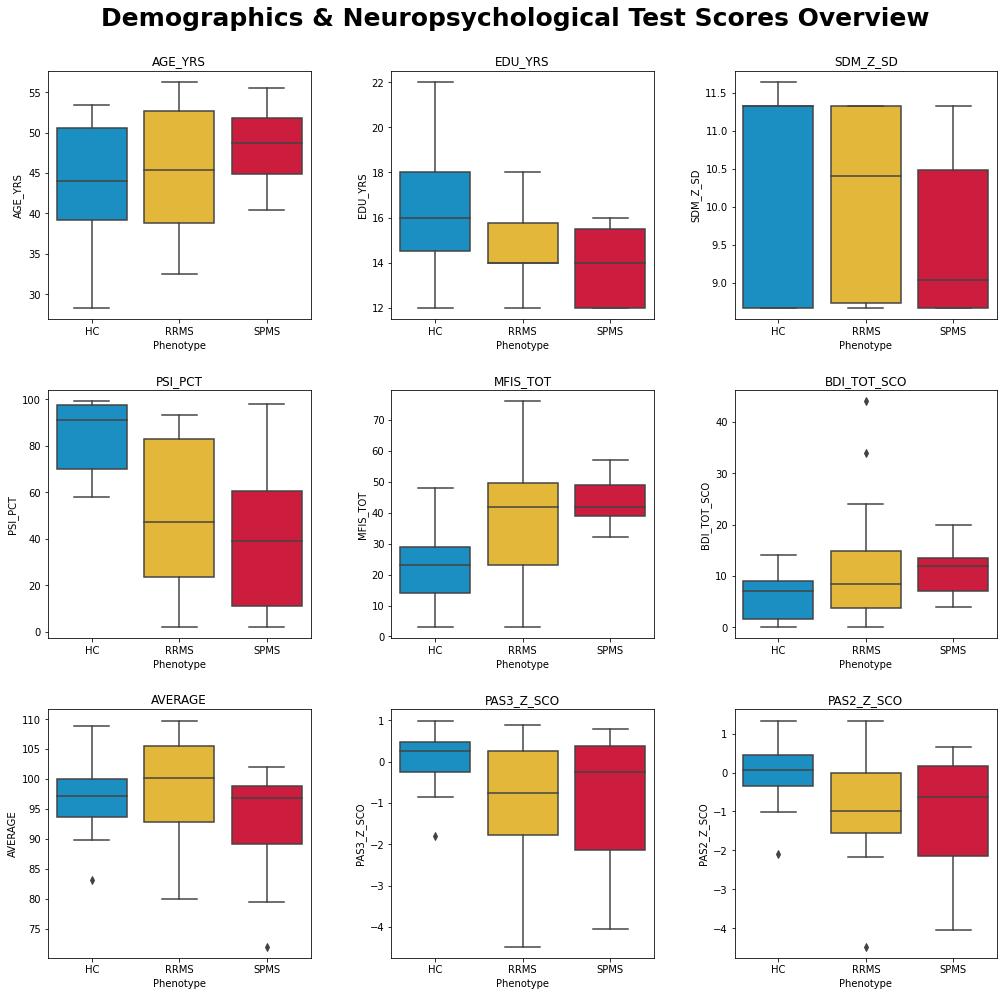

In [12]:
# define columns to be plotted
metrics = ['AGE_YRS', 'EDU_YRS', 'SDM_Z_SD', 'PSI_PCT', 'MFIS_TOT', 'BDI_TOT_SCO', 'AVERAGE', 'PAS3_Z_SCO', 'PAS2_Z_SCO']

fig, ax = plt.subplots(3, 3, figsize=(15, 14))
fig.tight_layout(pad=5)
fig.suptitle('Demographics & Neuropsychological Test Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(metrics)):
    sns.boxplot(ax=ax[i], x='MS_TYPE$', y=metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(metrics[i])
    ax[i].set_xlabel('Phenotype')


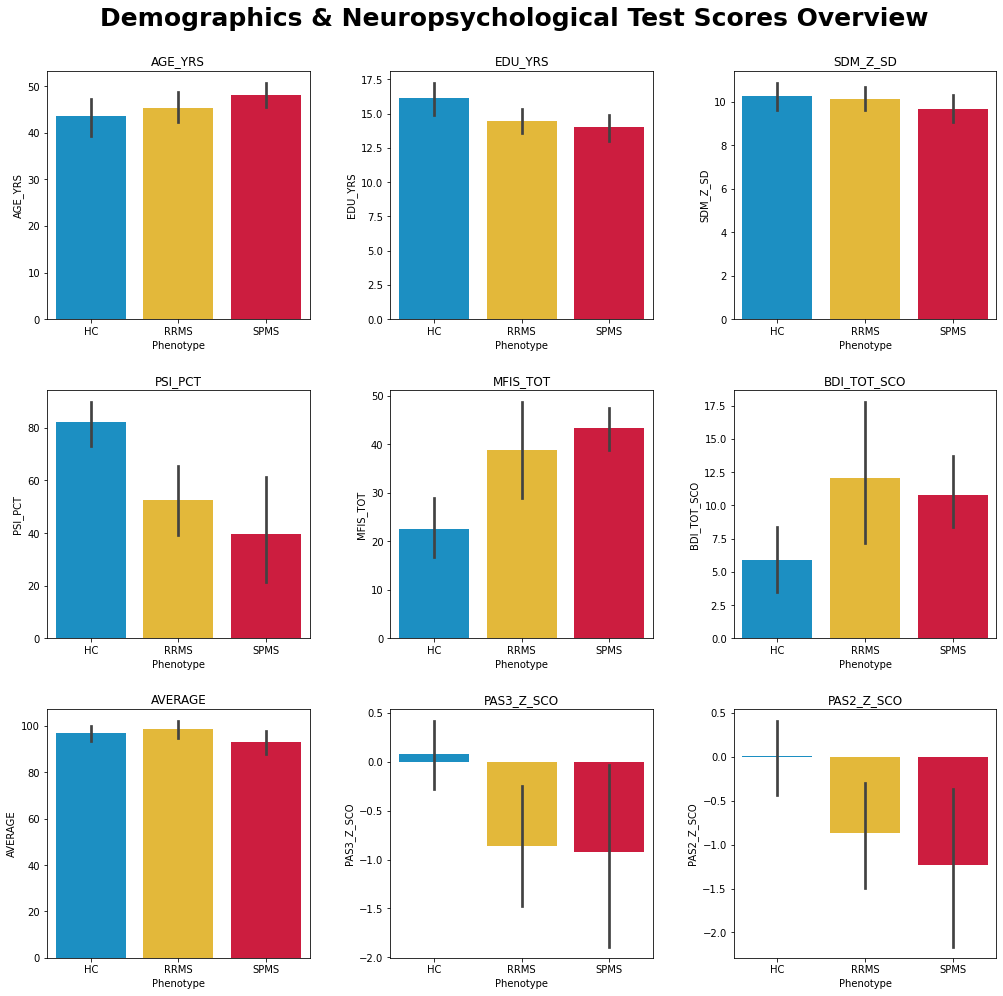

In [13]:
# define columns to be plotted
metrics = ['AGE_YRS', 'EDU_YRS', 'SDM_Z_SD', 'PSI_PCT', 'MFIS_TOT', 'BDI_TOT_SCO', 'AVERAGE', 'PAS3_Z_SCO', 'PAS2_Z_SCO']

fig, ax = plt.subplots(3, 3, figsize=(15, 14))
fig.tight_layout(pad=5)
fig.suptitle('Demographics & Neuropsychological Test Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(metrics[i])
    ax[i].set_xlabel('Phenotype')


In [14]:
# handedness scores
handedness_metrics = [
'HANDED$',
'DEGREE$',
'HAND_SCORE',
'DOM_SEQ_TOT1',
'DOM_SEQ_ERR1',
'DOM_SEQ_COR1',
'NON_SEQ_TOT1',
'NON_SEQ_ERR1',
'NON_SEQ_COR1',
'BI_IN_TOT1',
'BI_IN_TOT1.1',
'BI_IN_COR1',
'BI_OUT_TOT1',
'BI_OUT_TOT1.1',
'BI_OUT_COR1',
'NON_SEQ_TOT2',
'NON_SEQ_ERR2',
'NON_SEQ_COR2',
'DOM_SEQ_TOT2',
'DOM_SEQ_ERR2',
'DOM_SEQ_COR2',
'BI_IN_TOT2',
'BI_IN_ERR2',
'BI_IN_COR2',
'BI_OUT_TOT2',
'BI_OUT_ERR2',
'BI_OUT_COR2',
'SING_RT_TOT',
'SING_LT_TOT',
'LT_MEA_COR',
'LT_TOT_ERR',
'RT_MEA_COR',
'RT_TOT_ERR',
'IN_MEA_COR',
'OUT_MEA_COR']

In [15]:
df_neuropsych[handedness_metrics[2]].dtype

dtype('int64')

In [16]:
# get data types for each of these columns
for col in handedness_metrics:
    print(df_neuropsych[col].dtypes)

object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
float64
int64
float64
float64


Plot for HANDED$ TBD...
Plot for DEGREE$ TBD...


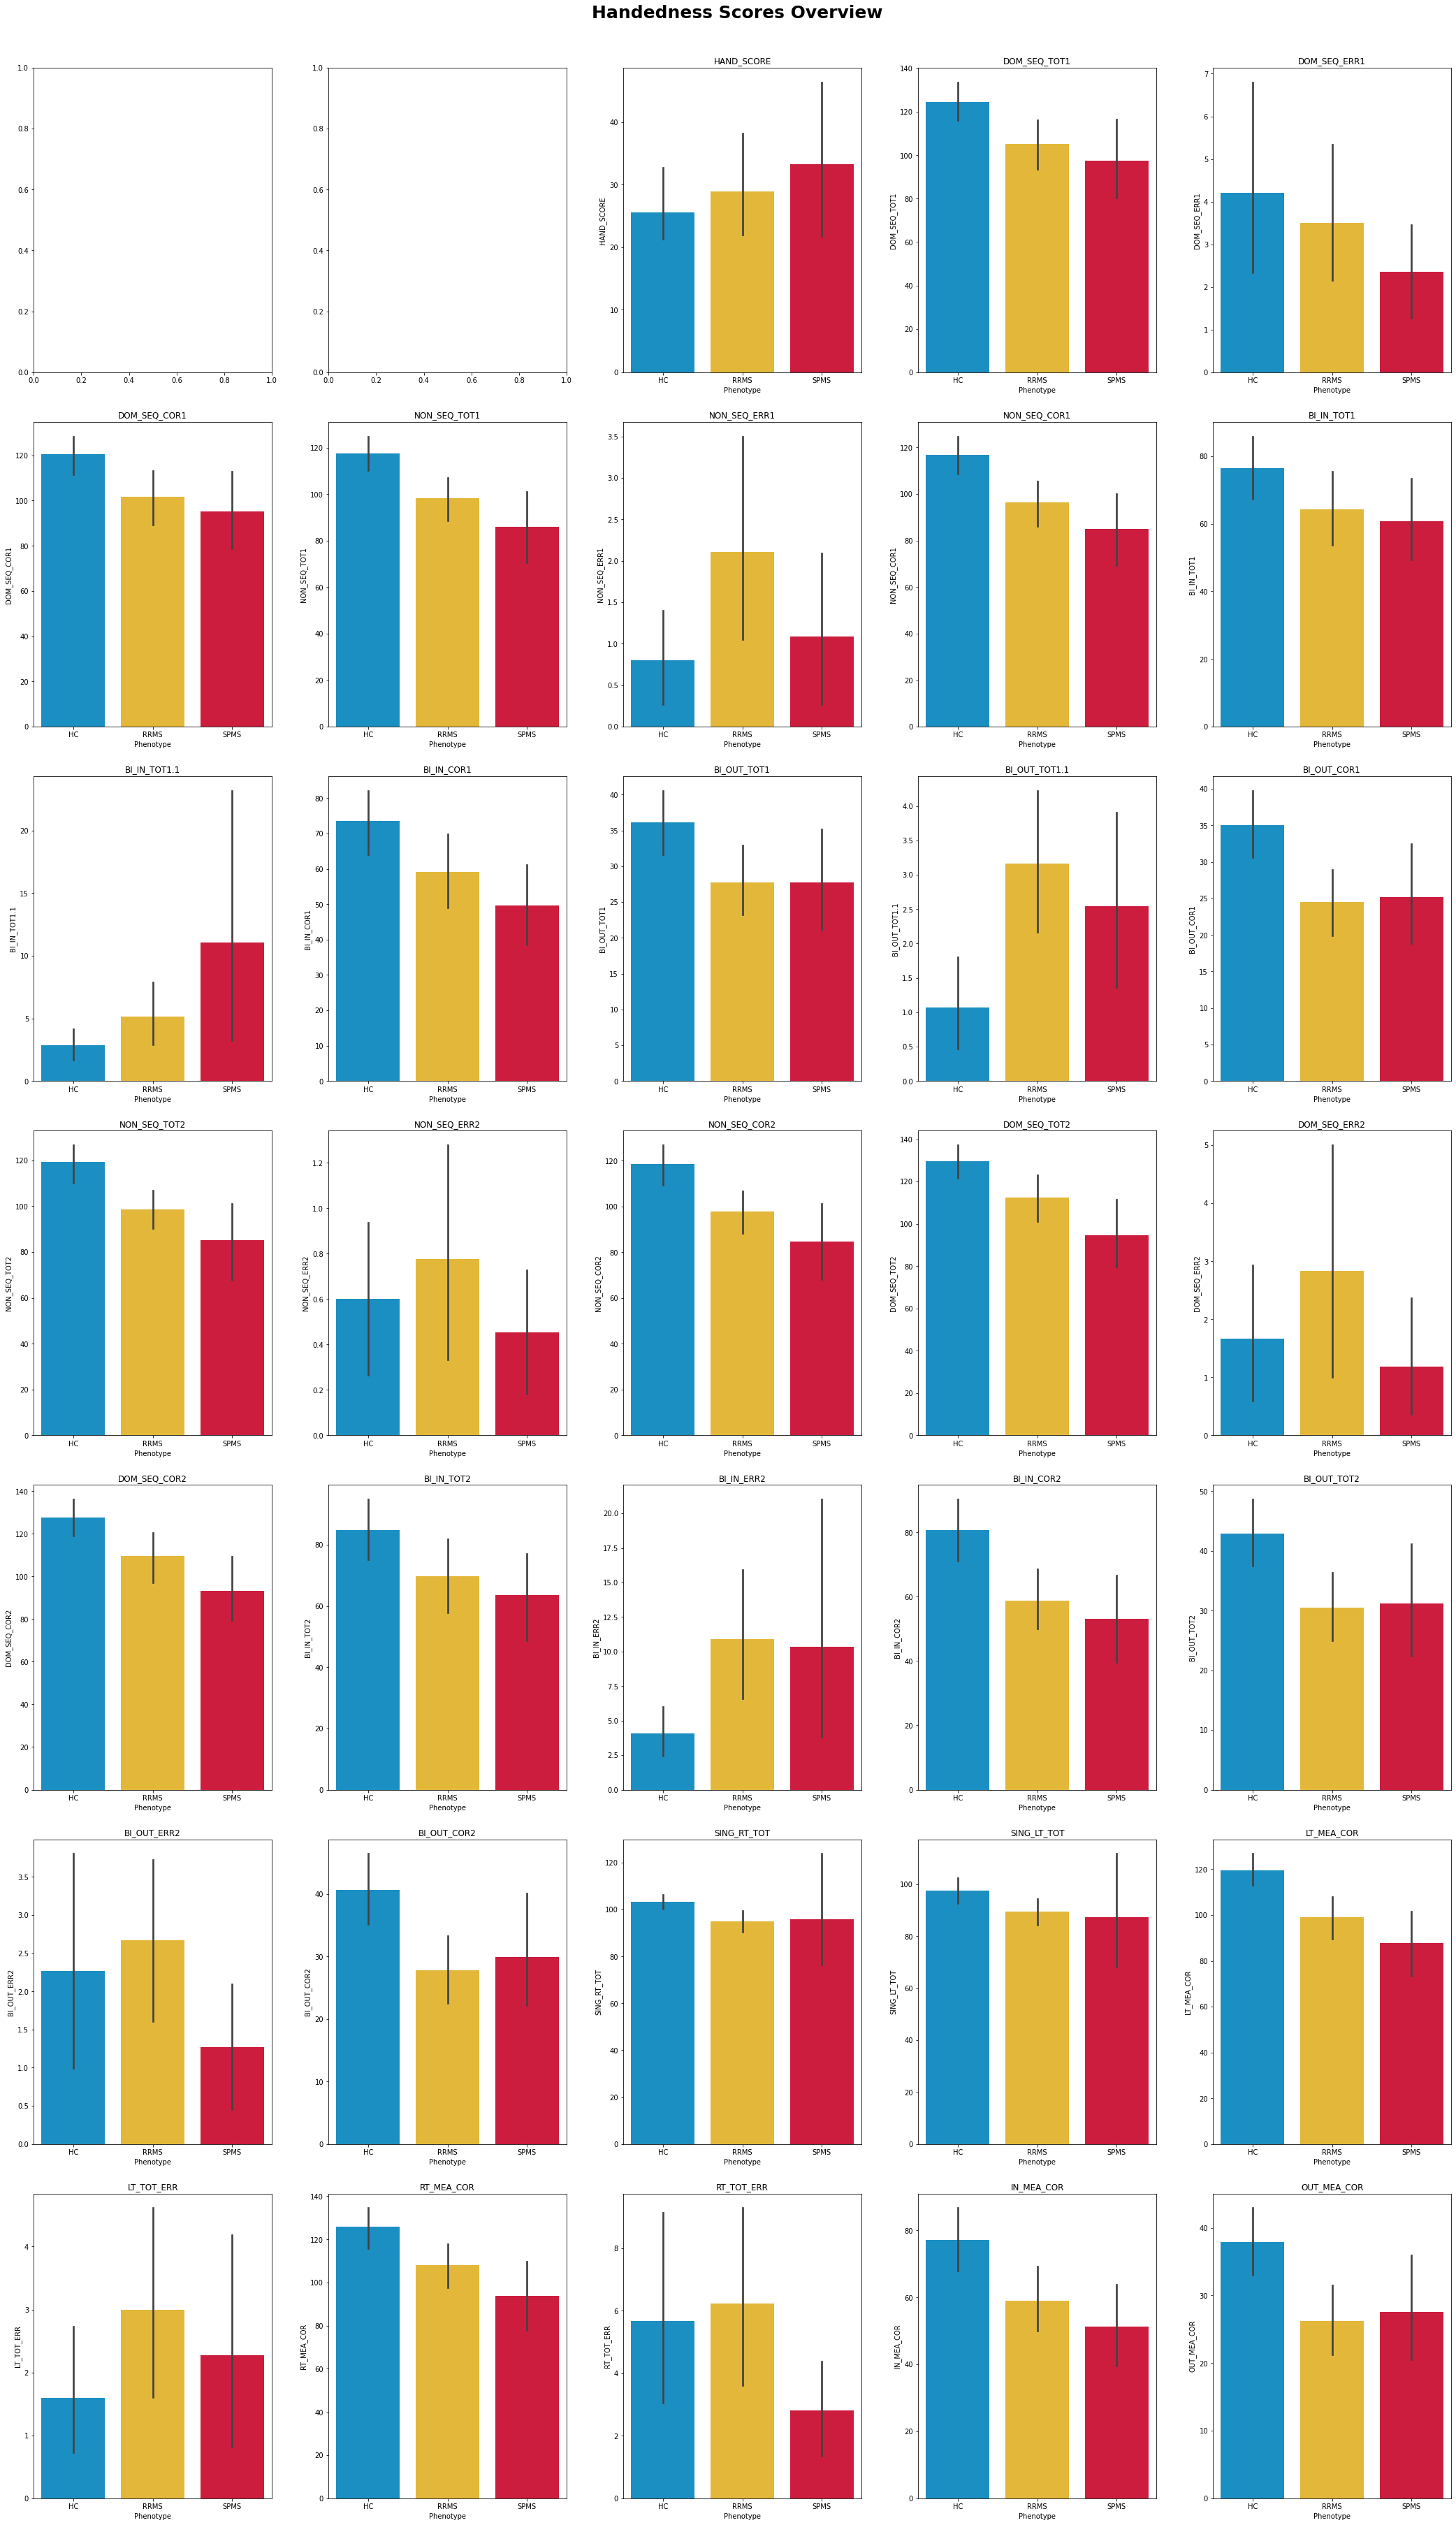

In [17]:
fig, ax = plt.subplots(7,5, figsize=(30, 50))
fig.tight_layout(pad=5)
fig.suptitle('Handedness Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(handedness_metrics)):

       # if column is categorical, use bar chart
       if df_neuropsych[handedness_metrics[i]].dtypes == 'object':
              #sns.boxplot(ax=ax[i], x='MS_TYPE$', y=handedness_metrics[i], data=df_neuropsych, order=order, palette=palette)
              print(f'Plot for {handedness_metrics[i]} TBD...')

       # else, use barplot
       else: 
              sns.barplot(ax=ax[i], x='MS_TYPE$', y=handedness_metrics[i], data=df_neuropsych, order=order, palette=palette)
              ax[i].set_title(handedness_metrics[i])
              ax[i].set_xlabel('Phenotype')


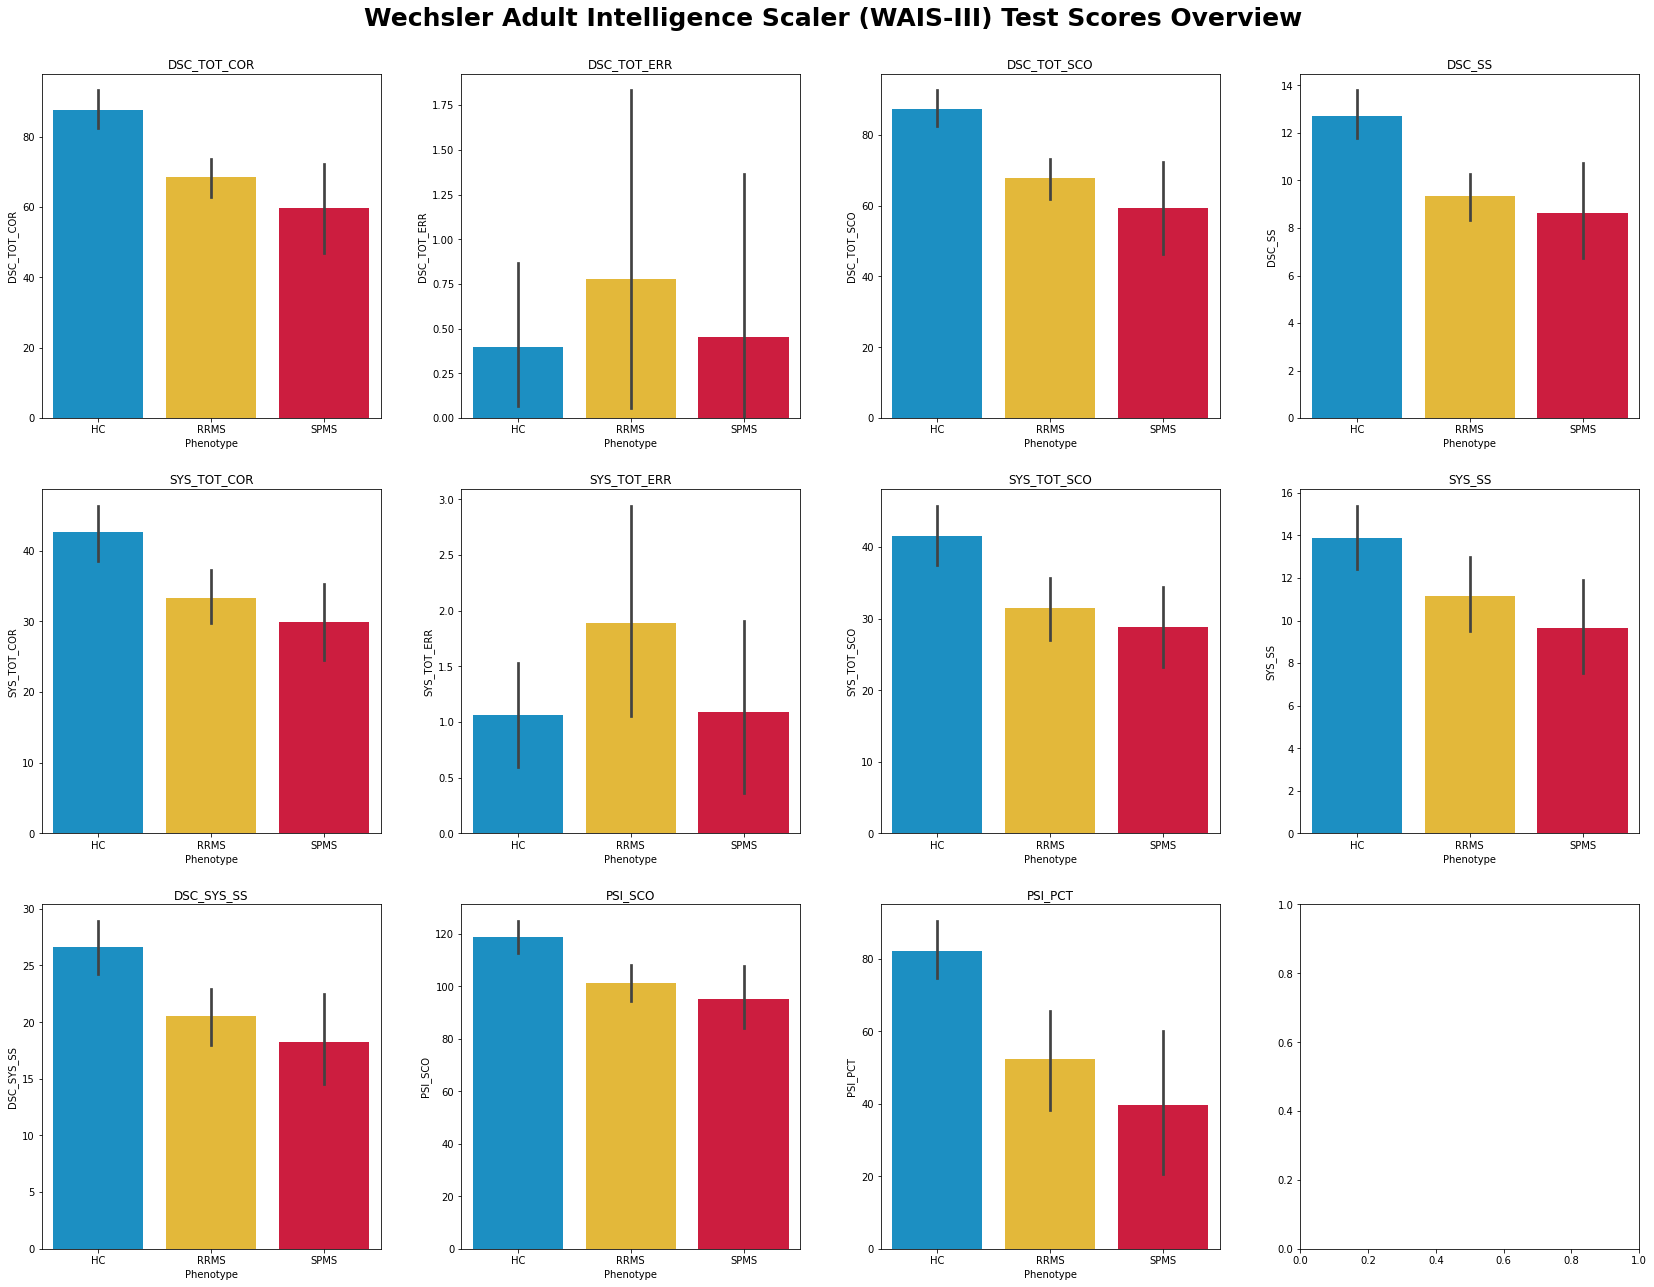

In [18]:
# WAIS3 subscores
wais3_metrics = ['DSC_TOT_COR',
'DSC_TOT_ERR',
'DSC_TOT_SCO',
'DSC_SS',
'SYS_TOT_COR',
'SYS_TOT_ERR',
'SYS_TOT_SCO',
'SYS_SS',
'DSC_SYS_SS',
'PSI_SCO',
'PSI_PCT'] 

fig, ax = plt.subplots(3, 4, figsize=(24, 18))
fig.tight_layout(pad=5)
fig.suptitle('Wechsler Adult Intelligence Scaler (WAIS-III) Test Scores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(wais3_metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=wais3_metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(wais3_metrics[i])
    ax[i].set_xlabel('Phenotype')


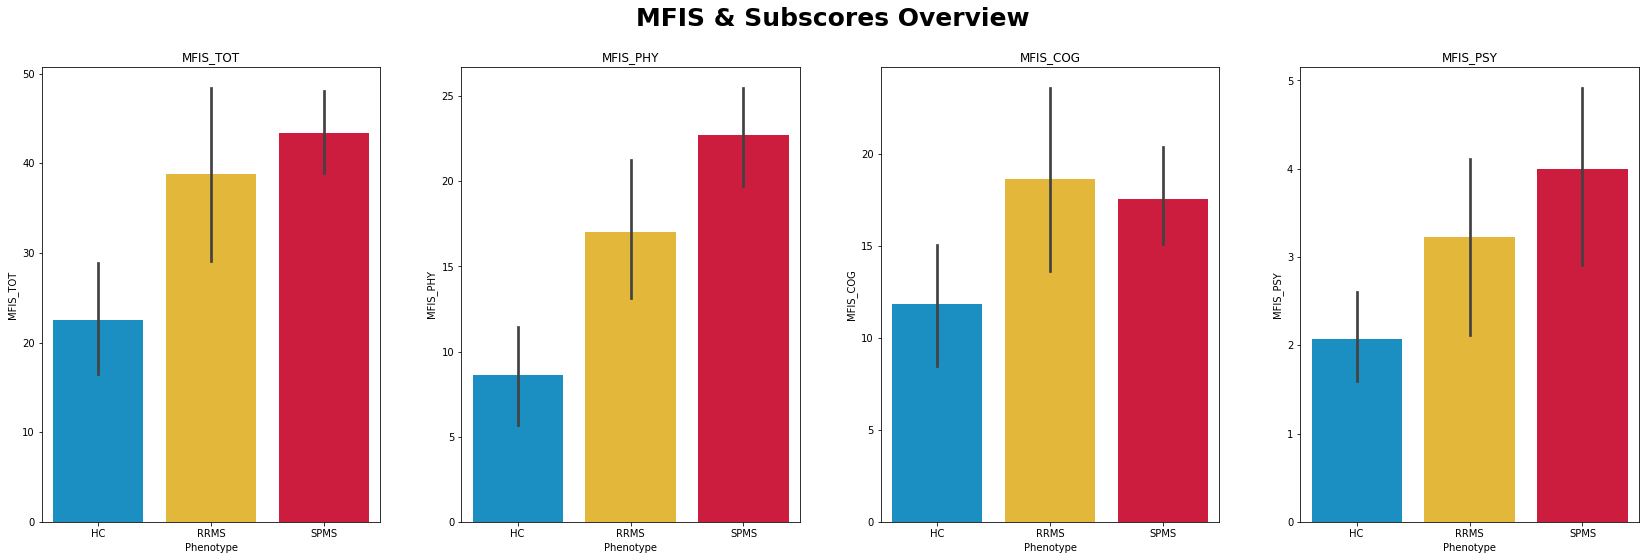

In [19]:
# MFIS subscores
MFIS_metrics = ['MFIS_TOT','MFIS_PHY','MFIS_COG','MFIS_PSY']

fig, ax = plt.subplots(1,4, figsize=(24,8))
fig.tight_layout(pad=5)
fig.suptitle('MFIS & Subscores Overview', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(MFIS_metrics)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=MFIS_metrics[i], data=data, order=order, palette=palette)
    ax[i].set_title(MFIS_metrics[i])
    ax[i].set_xlabel('Phenotype')

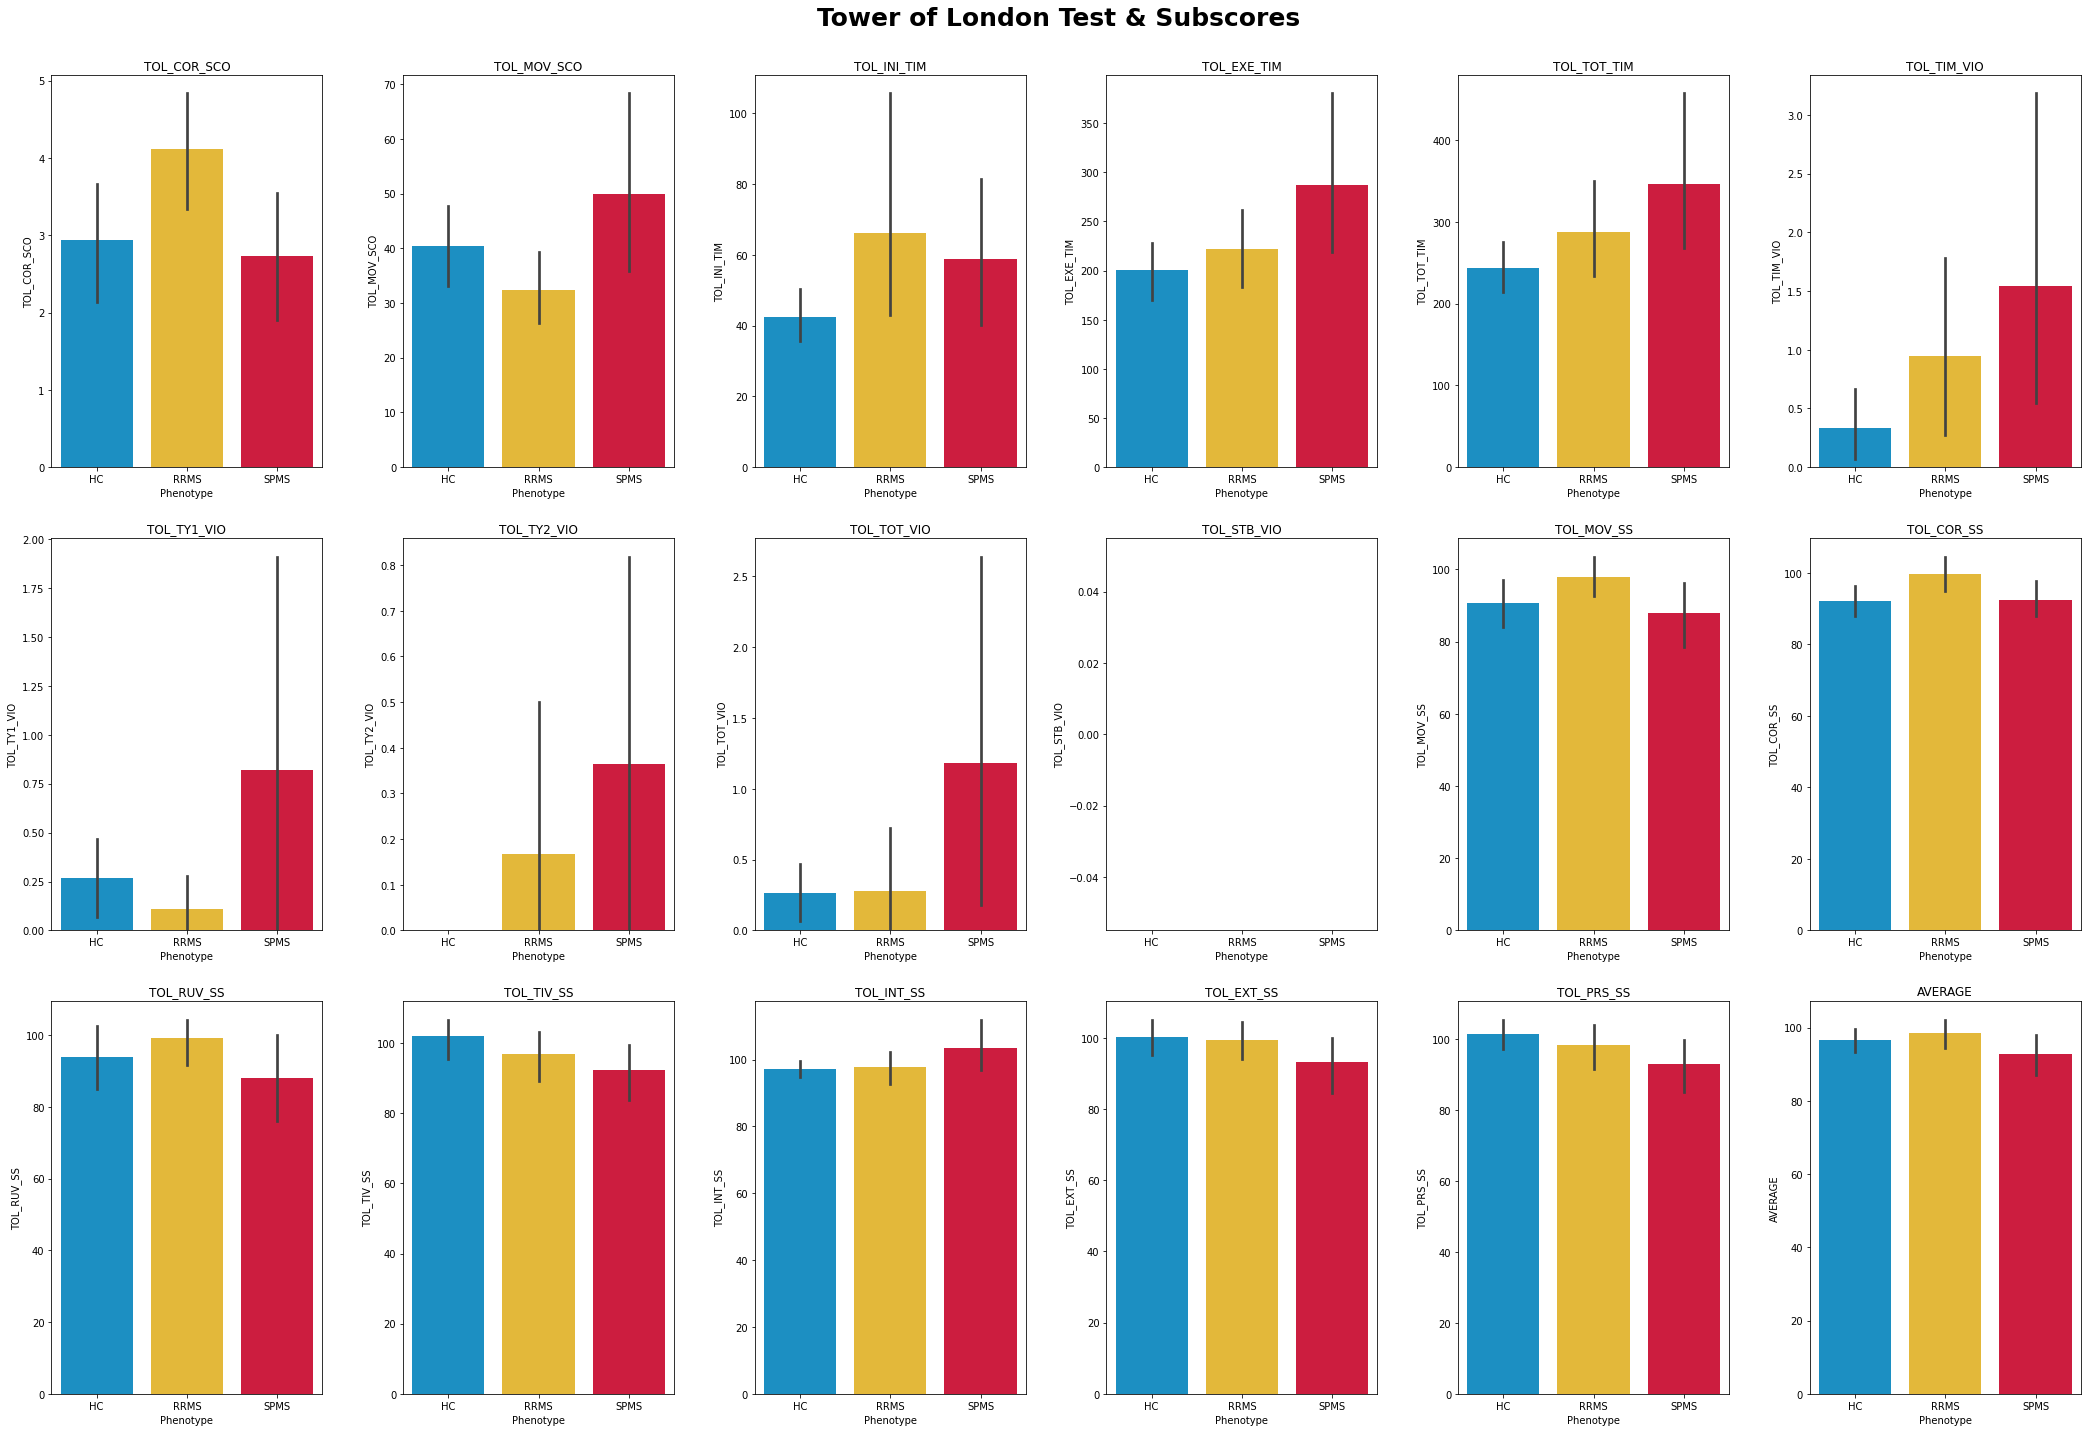

In [20]:
# TOL-2 subscores
TOL2_subscores = [
'TOL_COR_SCO',
'TOL_MOV_SCO',
'TOL_INI_TIM',
'TOL_EXE_TIM',
'TOL_TOT_TIM',
'TOL_TIM_VIO',
'TOL_TY1_VIO',
'TOL_TY2_VIO',
'TOL_TOT_VIO',
'TOL_STB_VIO',
'TOL_MOV_SS',
'TOL_COR_SS',
'TOL_RUV_SS',
'TOL_TIV_SS',
'TOL_INT_SS',
'TOL_EXT_SS',
'TOL_PRS_SS',
'AVERAGE']


fig, ax = plt.subplots(3,6, figsize=(30, 20))
fig.tight_layout(pad=5)
fig.suptitle('Tower of London Test & Subscores', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(TOL2_subscores)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=TOL2_subscores[i], data=data, order=order, palette=palette)
    ax[i].set_title(TOL2_subscores[i])
    ax[i].set_xlabel('Phenotype')

In [21]:
# EDSS and subscores
filter_ms = ['MS_TYPE$', 'EDSS', 'FSS_VISUAL',
       'FSS_BRSTEM', 'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY',
       'FSS_BOWBLAD', 'FSS_CEREBRAL']

EDSS_subscores = ['EDSS', 'FSS_VISUAL',
       'FSS_BRSTEM', 'FSS_PYRAMID', 'FSS_CEREBELL', 'FSS_SENSORY',
       'FSS_BOWBLAD', 'FSS_CEREBRAL']

In [22]:
df_MS_subgroup = df_neuropsych[df_neuropsych['GROUP$'] == "MS"]

# filter edss subscores only and delete rows containing NaNs
df_MS_subgroup = df_MS_subgroup[filter_ms]

# force datatypes to numeric
df_MS_subgroup[EDSS_subscores] = df_MS_subgroup[EDSS_subscores].apply(pd.to_numeric, errors='coerce')


# drop rows with nan values
df_MS_subgroup = df_MS_subgroup.dropna()
df_MS_subgroup

,MS_TYPE$,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,SPMS,3.0,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000
1,SPMS,5.5,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000
2,RRMS,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,SPMS,6.5,1.000000,2.000000,5.000000,3.000000,3.000000,1.000000,1.000000
4,SPMS,4.0,0.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000
7,RRMS,1.5,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
8,RRMS,2.0,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
9,RRMS,3.0,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000
11,RRMS,1.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
12,RRMS,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
df_MS_subgroup['MS_TYPE$'].value_counts()

RRMS    17
SPMS    11
Name: MS_TYPE$, dtype: int64

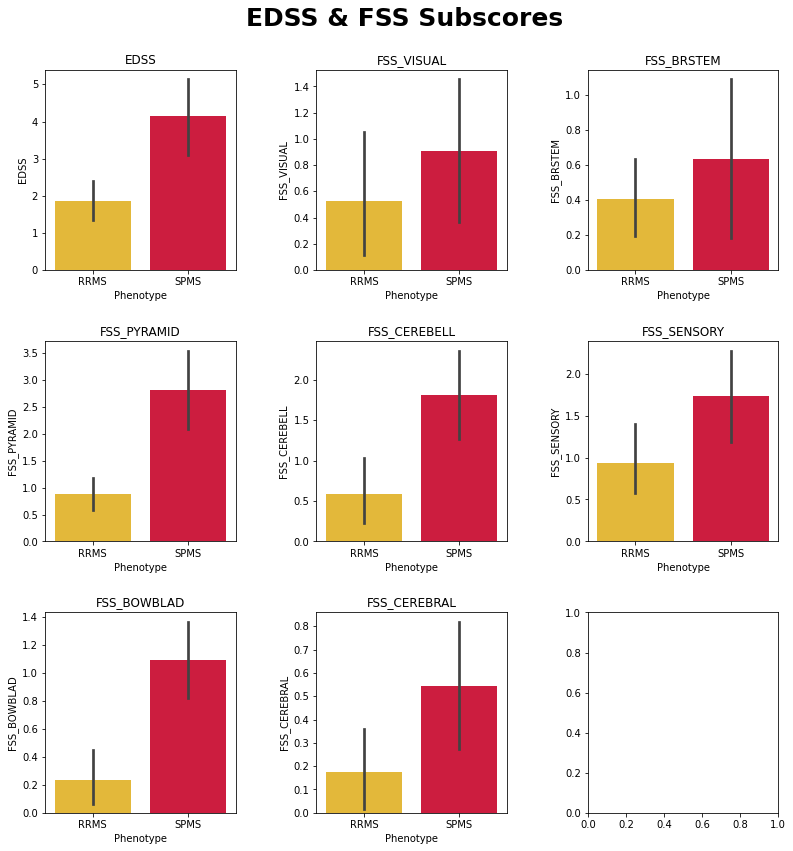

In [24]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
fig.tight_layout(pad=5)
fig.suptitle('EDSS & FSS Subscores', fontsize=25, fontweight='bold', y=1.01)
ax = ax.ravel()

for i in range(len(EDSS_subscores)):
    sns.barplot(ax=ax[i], x='MS_TYPE$', y=EDSS_subscores[i], data=df_MS_subgroup, order=['RRMS', 'SPMS'], palette=['#FFC61E', '#E9002D'])
    ax[i].set_title(EDSS_subscores[i])
    ax[i].set_xlabel('Phenotype')

## Principal Component Analysis

### Format Dataframe for PCA

In [25]:
# remove phenotype column to make it its own label
df_PCA_labels = data.pop('MS_TYPE$')

In [26]:
# filter out all numeric columns to perform PCA on
df_PCA = data._get_numeric_data()
df_PCA = df_PCA.drop(['Unnamed: 0'], axis=1)

In [27]:
# standardize all columns
scaler = StandardScaler()
df_PCA_scaled = pd.DataFrame(scaler.fit_transform(df_PCA), columns = df_PCA.columns)

In [28]:
# remove any rows with NAN values (temporary solution)
df_PCA_scaled = df_PCA_scaled.dropna(axis=1)

In [29]:
import plotly.express as px

In [35]:

# label each PCA component by number
labels['color'] = 'Cohort'

fig = px.scatter_matrix(
    df_PCA_components,
    color=df_PCA_labels,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {pct_var:.2f}%',
    width=800, height=800
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [57]:
pct_var

64.33272559590026

In [47]:
n_components = 5
labels = {str(i): f"PC {i+1}" for i in range(n_components)}

# perform PCA
pca = PCA(n_components=n_components)
df_PCA_components = pca.fit_transform(df_PCA_scaled)
df_PCA_components = pd.DataFrame(df_PCA_components, columns = labels.values())

# get variances in percentage
pct_var = pca.explained_variance_ratio_.sum() * 100

In [52]:
df_PCA_labels.values

array(['SPMS', 'SPMS', 'RRMS', 'SPMS', 'SPMS', 'HC', 'RRMS', 'RRMS',
       'RRMS', 'RRMS', 'HC', 'RRMS', 'RRMS', 'HC', 'RRMS', 'RRMS', 'RRMS',
       'RRMS', 'HC', 'RRMS', 'RRMS', 'SPMS', 'HC', 'SPMS', 'RRMS', 'SPMS',
       'HC', 'HC', 'HC', 'HC', 'SPMS', 'RRMS', 'HC', 'RRMS', 'RRMS', 'HC',
       'SPMS', 'SPMS', 'HC', 'HC', 'SPMS', 'HC', 'HC', 'RRMS'],
      dtype=object)

In [56]:
pd.concat([df_PCA_components, df_PCA_labels], 

,PC 1,PC 2,PC 3,PC 4,PC 5,0
0,0.341121,5.984297,6.320483,5.370135,-1.731180,NaN
1,-4.603462,-0.227437,0.819381,-1.570594,-0.723957,NaN
2,-5.746078,1.581110,-0.466803,-0.346620,0.895387,NaN
3,4.639196,0.836306,-2.061434,-1.145074,-0.189345,NaN
4,6.657840,3.644073,-4.094392,-1.376094,-1.639155,NaN
...,...,...,...,...,...,...
39,NaN,NaN,NaN,NaN,NaN,HC
40,NaN,NaN,NaN,NaN,NaN,SPMS
41,NaN,NaN,NaN,NaN,NaN,HC
42,NaN,NaN,NaN,NaN,NaN,HC


In [53]:
sns.pairplot(df_PCA_components, hue=df_PCA_labels.values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
# scale data appropriately, try StandardScaler first
df_PCA_scaled[df_PCA_scaled.columns] = StandardScaler().fit_transform()

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [ ]:
# one-hot encode the categorical columns for gender and MS type
df_neuropsych_for_PCA = pd.get_dummies(df_neuropsych, columns = ['SEX$', 'MS_TYPE$'])

# drop non-numeric columns
df_neuropsych_for_PCA = df_neuropsych_for_PCA._get_numeric_data()

# drop the unnamed columns
df_neuropsych_for_PCA = df_neuropsych_for_PCA.drop(['Unnamed: 0'], axis=1)

df_neuropsych_for_PCA.head(5)

,AGE_YRS,EDU_YRS,HEIGHT_CM,WEIGHT_KG,HAND_SCORE,DOM_SEQ_TOT1,DOM_SEQ_ERR1,DOM_SEQ_COR1,NON_SEQ_TOT1,NON_SEQ_ERR1,NON_SEQ_COR1,BI_IN_TOT1,BI_IN_TOT1.1,BI_IN_COR1,BI_OUT_TOT1,BI_OUT_TOT1.1,BI_OUT_COR1,NON_SEQ_TOT2,NON_SEQ_ERR2,NON_SEQ_COR2,DOM_SEQ_TOT2,DOM_SEQ_ERR2,DOM_SEQ_COR2,BI_IN_TOT2,BI_IN_ERR2,BI_IN_COR2,BI_OUT_TOT2,BI_OUT_ERR2,BI_OUT_COR2,SING_RT_TOT,SING_LT_TOT,LT_MEA_COR,LT_TOT_ERR,RT_MEA_COR,RT_TOT_ERR,IN_MEA_COR,OUT_MEA_COR,SDM_COR,SDM_Z_MEA,SDM_Z_SD,SDM_Z_SCO,DSC_TOT_COR,DSC_TOT_ERR,DSC_TOT_SCO,DSC_SS,SYS_TOT_COR,SYS_TOT_ERR,SYS_TOT_SCO,SYS_SS,DSC_SYS_SS,PSI_SCO,PSI_PCT,MFIS_TEST,MFIS_TOT,MFIS_PHY,MFIS_COG,MFIS_PSY,BDI_TOT_SCO,TOL_COR_SCO,TOL_MOV_SCO,TOL_INI_TIM,TOL_EXE_TIM,TOL_TOT_TIM,TOL_TIM_VIO,TOL_TY1_VIO,TOL_TY2_VIO,TOL_TOT_VIO,TOL_STB_VIO,TOL_MOV_SS,TOL_COR_SS,TOL_RUV_SS,TOL_TIV_SS,TOL_INT_SS,TOL_EXT_SS,TOL_PRS_SS,AVERAGE,PAS3_TOT_COR,PAS3_PCT_COR,PAS3_Z_MEA,PAS3_Z_SD,PAS3_Z_SCO,PAS2_TOT_COR,PAS2_PCT_COR,PAS2_Z_MEA,PAS2_Z_SD,PAS2_Z_SCO,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL,SEX$_Female,SEX$_Male,MS_TYPE$_HC,MS_TYPE$_RRMS,MS_TYPE$_SPMS
0,48.659822,14,177,79,77,145,1,144,106,5,101,96,69,27,28,3,25,115,1,114,77,0,77,91,56,35,42,3,39,214,199,111.0,1,110.5,6,31.0,32.0,56,58.31,8.67,-0.266436,68,0,68,10,29,1,28,9,19,96,39,1,41,27,11,3,14,5,30,144,215,359,2,0,0,0,0,100,106,104,78,134,100,90,101.714286,47,78.333333,50.4,9.7,-0.350515,37.0,61.666667,39.4,10.2,-0.235294,3.0,1.0,0.0,2.0,2.0,1.0,0.0,0,1,0,0,1
1,46.121834,16,152,62,18,128,5,123,118,0,118,87,3,84,29,0,29,122,0,122,136,0,136,88,7,81,33,1,32,89,79,120.0,0,132.0,5,82.5,30.5,68,58.31,8.67,1.117647,88,0,88,14,48,0,48,17,31,131,98,1,41,25,11,5,6,4,25,25,199,224,1,0,0,0,0,106,100,104,92,92,102,104,100.000000,54,90.000000,50.4,9.7,0.371134,33.0,55.000000,39.4,10.2,-0.627451,5.5,1.0,1.0,4.0,3.0,2.0,1.0,1,0,0,0,1
2,38.214921,15,165,102,18,141,6,135,119,1,118,101,9,92,29,2,27,108,0,108,144,0,144,108,21,87,42,4,38,93,86,113.5,1,142.5,6,89.5,32.5,61,60.95,11.32,0.004417,84,0,84,12,45,0,45,15,27,120,91,1,21,13,7,1,11,6,21,65,150,215,0,0,0,0,0,106,108,104,108,104,108,104,106.000000,59,98.333333,50.4,9.7,0.886598,50.0,83.333333,39.4,10.2,1.039216,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1,0
3,49.785079,14,185,90,20,87,0,87,74,0,74,46,0,46,17,0,17,79,0,79,92,0,92,41,1,40,23,0,23,69,62,76.5,0,89.5,0,43.0,20.0,48,58.31,8.67,-1.189158,47,0,47,6,25,0,25,9,15,86,18,1,50,25,21,4,8,2,47,36,271,307,0,0,0,0,0,86,88,104,108,96,94,96,96.000000,54,90.000000,50.4,9.7,0.371134,46.0,76.666667,39.4,10.2,0.647059,6.5,1.0,2.0,5.0,3.0,1.0,1.0,0,1,0,0,1
4,40.454483,12,185,88,50,81,3,78,55,1,54,41,4,37,26,4,22,50,0,50,78,1,77,40,8,32,29,1,28,57,76,79.5,4,52.5,1,34.5,25.0,46,59.87,10.49,-1.322212,45,0,45,5,30,1,29,9,14,84,14,1,45,23,17,5,12,2,26,46,177,223,0,0,0,0,0,104,88,104,108,98,106,106,102.000000,16,26.666667,46.7,9.1,-3.373626,0.0,0.000000,35.1,9.6,-3.656250,4.0,0.0,1.0,3.0,2.0,1.0,0.0,0,1,0,0,1


In [ ]:
df_neuropsych_for_PCA.shape

(44, 98)

In [ ]:
### Scale & Perform PCA


# Functional Image Data - PLS Cross Validation

In [ ]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

#datamat = pd.read_csv('../datamat.csv', sep='\t', header=None)
#behavmat = pd.read_csv('../behavmat.csv', sep='\t', header=None)
#behav_names = pd.read_csv('../behavnames.csv', sep='\t', header=None)

In [ ]:
# load data exported from MATLAB
x = np.genfromtxt('../datamat.csv', delimiter='\t')
y = np.genfromtxt('../behavmat.csv', delimiter='\t')
behav_names = pd.read_csv('../behavnames.csv', sep='\t', header=None)

In [ ]:
print(x.shape)
print(y.shape)

(42, 8646)
(42, 13)


In [ ]:
# Define PLS object
pls = PLSRegression(n_components=5)
 
# Fit
pls.fit(x, y)

# Cross-validation
y_cv = cross_val_predict(pls, x, y, cv=10)
 
# Calculate scores
score = r2_score(y, y_cv)
mse = mean_squared_error(y, y_cv)

In [ ]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
 
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return


92% completed

/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 36
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 36
  warnings.warn(f"Y residual is constant at iteration {k}")


95% completed

/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 36
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 36
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 37
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 37
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant a

97% completed

/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 37
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 37
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 36
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 36
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant a

100% completed
Suggested number of components:  1



/home/forest/anaconda3/envs/nipy/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:304: UserWarning: Y residual is constant at iteration 37
  warnings.warn(f"Y residual is constant at iteration {k}")


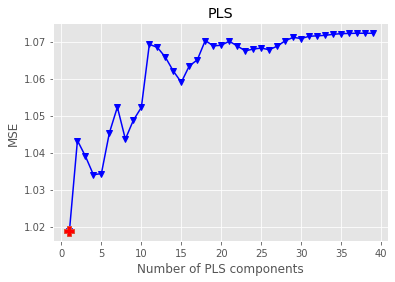

R2 calib: 0.195
R2 CV: -0.044
MSE calib: 0.786
MSE CV: 1.019


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
optimise_pls_cv(x,y, 40, plot_components=True)
